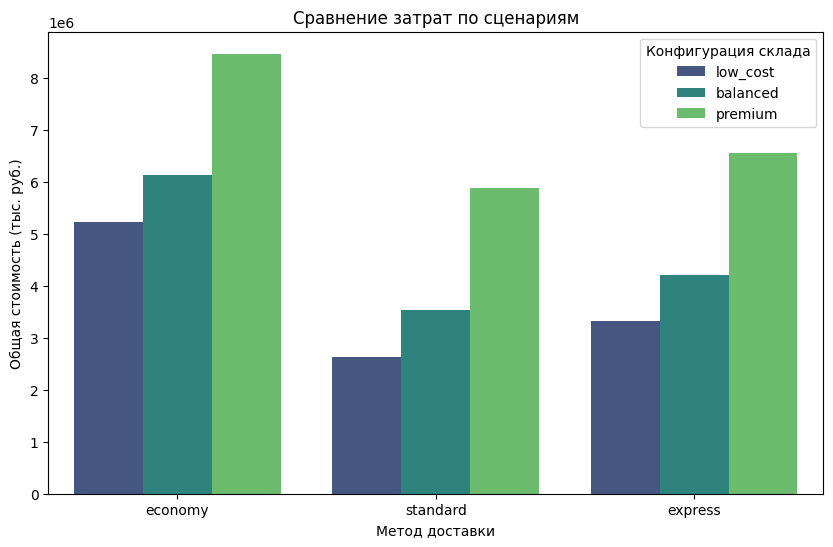

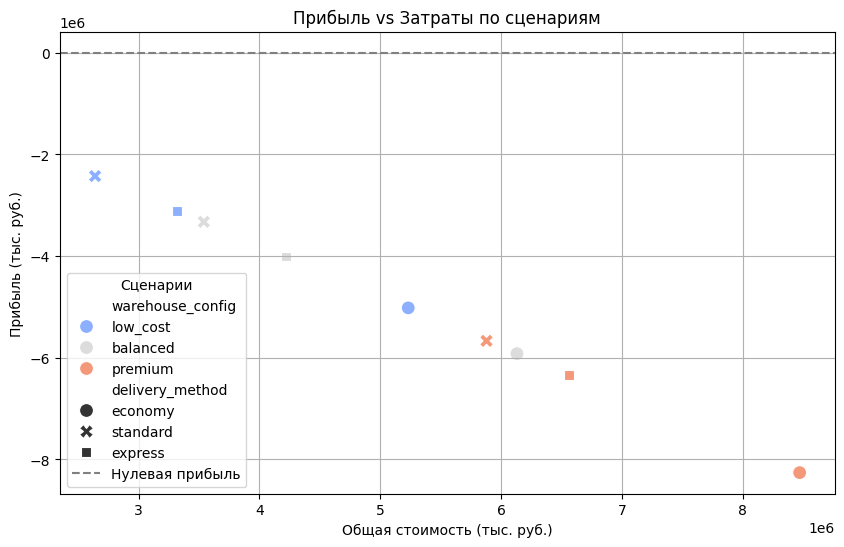

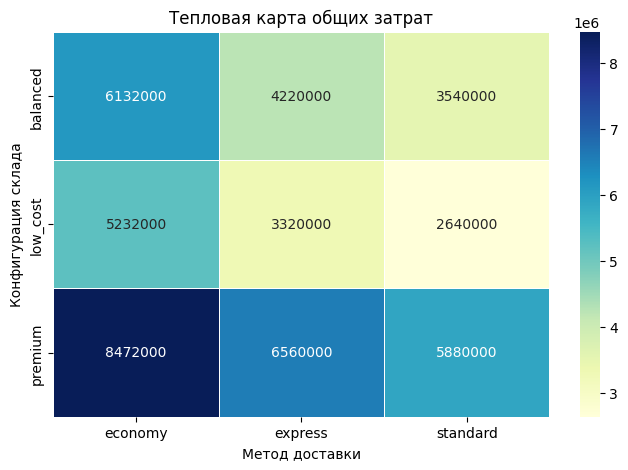

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Задаем параметры анализа
warehouse_configs = {
    "low_cost": {"num_warehouses": 3, "storage_cost": 50000},
    "balanced": {"num_warehouses": 5, "storage_cost": 75000},
    "premium": {"num_warehouses": 8, "storage_cost": 120000},
}

delivery_methods = {
    "economy": {"cost_per_km": 1.2, "speed_factor": 0.8},
    "standard": {"cost_per_km": 1.5, "speed_factor": 1.0},
    "express": {"cost_per_km": 2.0, "speed_factor": 1.5},
}

regional_demand = {"north": 300, "south": 500, "west": 400, "east": 600}

distances = {"north": 400, "south": 800, "west": 600, "east": 1000}

prices_per_bottle = {"north": 120, "south": 110, "west": 115, "east": 125}

penalty_per_day = 10000  # Штраф за задержку

# Генерация сценариев
scenarios = []
for warehouse_key, warehouse in warehouse_configs.items():
    for delivery_key, delivery in delivery_methods.items():
        scenario = {
            "warehouse_config": warehouse_key,
            "delivery_method": delivery_key,
            "num_warehouses": warehouse["num_warehouses"],
            "storage_cost": warehouse["storage_cost"],
            "cost_per_km": delivery["cost_per_km"],
            "speed_factor": delivery["speed_factor"],
        }
        scenarios.append(scenario)

# Анализ сценариев
results = []
for scenario in scenarios:
    total_cost, total_revenue, total_profit = 0, 0, 0
    for region, demand in regional_demand.items():
        distance = distances[region]
        price = prices_per_bottle[region]

        # Выручка
        revenue = demand * price

        # Затраты
        delivery_cost = distance * scenario["cost_per_km"] * demand
        storage_cost = scenario["storage_cost"] * scenario["num_warehouses"]
        delay_days = max(0, (distance / (scenario["speed_factor"] * 500)) - 2)  # задержка
        delay_penalty = delay_days * penalty_per_day * demand

        # Итоговые показатели
        total_revenue += revenue
        total_cost += delivery_cost + storage_cost + delay_penalty

    # Прибыль
    total_profit = total_revenue - total_cost

    results.append({
        "warehouse_config": scenario["warehouse_config"],
        "delivery_method": scenario["delivery_method"],
        "total_cost": total_cost,
        "total_revenue": total_revenue,
        "total_profit": total_profit,
    })

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# --- Визуализация 1: Сравнение затрат для каждого сценария ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df,
    x="delivery_method",
    y="total_cost",
    hue="warehouse_config",
    palette="viridis",
)
plt.title("Сравнение затрат по сценариям")
plt.xlabel("Метод доставки")
plt.ylabel("Общая стоимость (тыс. руб.)")
plt.legend(title="Конфигурация склада")
plt.show()

# --- Визуализация 2: Прибыль по сценариям ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=results_df,
    x="total_cost",
    y="total_profit",
    hue="warehouse_config",
    style="delivery_method",
    palette="coolwarm",
    s=100,
)
plt.axhline(0, color="gray", linestyle="--", label="Нулевая прибыль")
plt.title("Прибыль vs Затраты по сценариям")
plt.xlabel("Общая стоимость (тыс. руб.)")
plt.ylabel("Прибыль (тыс. руб.)")
plt.legend(title="Сценарии")
plt.grid()
plt.show()

# --- Визуализация 3: Тепловая карта затрат ---
heatmap_data = results_df.pivot(
    index="warehouse_config",
    columns="delivery_method",
    values="total_cost"
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5,
)
plt.title("Тепловая карта общих затрат")
plt.ylabel("Конфигурация склада")
plt.xlabel("Метод доставки")
plt.show()
